# Demo notebook for loading/filtering STORM datasets

Version 1.1, 05 Jan 2023

https://www.nature.com/articles/s41597-020-0381-2

https://doi.org/10.4121/uuid:82c1dc0d-5485-43d8-901a-ce7f26cda35d

https://data.4tu.nl/articles/STORM_IBTrACS_present_climate_synthetic_tropical_cyclone_tracks/12706085?file=24876980

The 10,000 year TC STORM dataset, based on the present climate, is publicly accessible and can be found on the 4TU.Centre for Research Data repository (https://doi.org/10.4121/uuid:82c1dc0d-5485-43d8-901a-ce7f26cda35d). The dataset is split in separate files per basin, with each .txt-file containing 1,000 years of simulations (i.e. 10 files per basin). Each .txt-file consists of a series of arrays, with each array being a single time step (3-hourly) for a synthetic TC. The colmns of the arrays are given in this table: 

<img src="static/Table2.png" width=600 height=600 />


Bloemendaal, Nadia; Haigh, I.D. (Ivan); de Moel, H. (Hans); Muis, S; Haarsma, R.J. (Reindert) et. al. (2022): STORM IBTrACS present climate synthetic tropical cyclone tracks. Version 4. 4TU.ResearchData. dataset. https://doi.org/10.4121/12706085.v4

Bloemendaal, Nadia; de Moel, H. (Hans); Martinez, Andrew B.; Muis, S. (Sanne); Haigh, I.D. (Ivan) et. al. (2023): STORM Climate Change synthetic tropical cyclone tracks. Version 2. 4TU.ResearchData. dataset. https://doi.org/10.4121/14237678.v2


In [2]:
import os
import sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

# import seaborn as sns
# sns.set()

import cartopy.crs as ccrs

import cheer_utils

In [3]:
# define some plotting vars

makeplots=True
writeoutputfiles=False


# define dicts for filtering circles for case study areas:
a=np.arange(0,370,10)*np.pi/180
rad=3
lo=-76.5
la=34.75
# test track screening circle
# rad= .3
# lo=-77.75
# la=35
nc_circ={'lo': lo,
         'la': la, 
         'rad': rad,
         'cirx': rad*np.cos(a)+lo,
         'ciry': rad*np.sin(a)+la}

rad=3
lo=-94
la=29.5
tx_circ={'lo': lo,
         'la':  la,
         'rad': rad,
         'cirx': rad*np.cos(a)+lo,
         'ciry': rad*np.sin(a)+la}

In [5]:
basin='NA'
ensnum=0

climate='current' 
model='present'  

# climate='future'
# model='HADGEM'   #  'CMCC' 'CNRM' 'ECEARTH' 'HADGEM'
# mod_dict= {'CMCC': 'CMCC-CM2-VHR4',   'CNRM':'CNRM-CM6-1-HR',  'ECEARTH':'EC-Earth3P-HR', 'HADGEM':'HadGEM3-GC31-HM'}

baseurl='https://tdsres.apps.renci.org/thredds/fileServer/datalayers/STORM_Bloemendaal_data'
if climate == 'current':
    url=f'{baseurl}/present/STORM_DATA_IBTRACS_{basin}_1000_YEARS_{ensnum}.txt'
else:
    url=f'{baseurl}/future/{model}/STORM_DATA_{mod_dict[model]}_{basin}_1000_YEARS_{ensnum}_IBTRACSDELTA.txt'

# #url=f'http://tds3.renci.org:8080/thredds/fileServer/cheer/STORM_Bloemendaal_data/future/HADGEM/STORM_DATA_HadGEM3-GC31-HM_{basin}_1000_YEARS_{ensnum}_IBTRACSDELTA.txt'
# print(url)
# print(' http://tdsres.apps.renci.org/thredds/fileServer/datalayers/STORM_Bloemendaal_data/present/STORM_DATA_IBTRACS_EP_1000_YEARS_0.txt')

# Load the STORM dataset
df=cheer_utils.LoadSTORMtracks()
idx_all=np.unique(df.index).astype(int)  # update index

# Compute a "distance" to the target areas, used to screen storm population
df['dist2nc']=np.sqrt(np.square(df['Longitude']-nc_circ['lo']) + np.square(df['Latitude']-nc_circ['la']))
df['dist2tx']=np.sqrt(np.square(df['Longitude']-tx_circ['lo']) + np.square(df['Latitude']-tx_circ['la']))
df['HollandB']=cheer_utils.HbFromRmwLat(df['RMW'],df['Latitude'])

Reading STORM tracks from https://tdsres.apps.renci.org/thredds/fileServer/datalayers/STORM_Bloemendaal_data/present_V4/STORM_DATA_IBTRACS_NA_1000_YEARS_0.txt


In [6]:
df

,Year,Month,Day,Hour,TC_number,Time_step,Basin_ID,Latitude,Longitude,Min_pres,MaxWindSpd,RMW,Category,Landfall,Dist2land,dist2nc,dist2tx,HollandB
abssn,,,,,,,,,,,,,,,,,,
1,0.0,10.0,1.0,0.0,0.0,0.0,1.0,8.9,-45.2,993.946699,20.371998,46.299999,0.0,0.0,851.946656,40.594489,52.969803,1.501835
1,0.0,10.0,1.0,3.0,0.0,1.0,1.0,9.0,-45.7,992.800000,21.200000,45.905957,0.0,0.0,815.967429,40.146015,52.470373,1.502786
1,0.0,10.0,1.0,6.0,0.0,2.0,1.0,9.1,-46.4,992.100000,21.700000,45.511914,0.0,0.0,766.103506,39.546586,51.787257,1.503737
1,0.0,10.0,1.0,9.0,0.0,3.0,1.0,9.2,-47.3,993.000000,21.100000,45.117872,0.0,0.0,705.759651,38.800032,50.921312,1.504688
1,0.0,10.0,1.0,12.0,0.0,4.0,1.0,9.3,-48.3,993.100000,20.900000,44.723829,0.0,0.0,647.548285,37.986083,49.965288,1.505639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10522,999.0,8.0,1.0,9.0,13.0,3.0,1.0,24.8,-88.5,990.300000,23.600000,92.599998,0.0,0.0,354.551796,15.588537,7.234639,1.032020
10522,999.0,8.0,1.0,12.0,13.0,4.0,1.0,25.4,-89.2,992.000000,22.400000,92.599998,0.0,0.0,391.816444,15.770621,6.312686,1.024250
10522,999.0,8.0,1.0,15.0,13.0,5.0,1.0,26.1,-89.9,990.000000,23.900000,92.599998,0.0,0.0,317.926065,15.949373,5.326350,1.015185


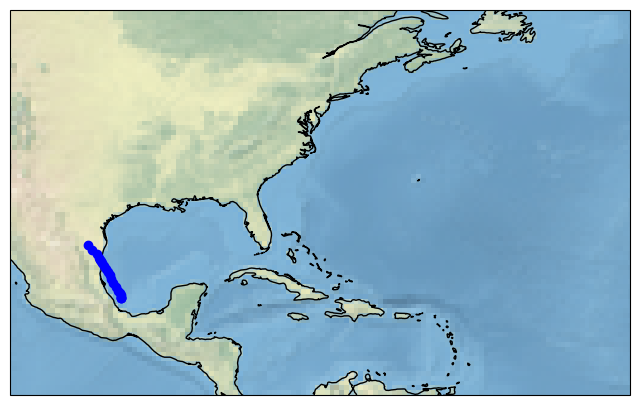

In [23]:
# cartopy test
fig = plt.figure(figsize=(8, 5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()

x=df.loc[df.index==4143].Longitude
y=df.loc[df.index==4143].Latitude

ax.plot(x, y,
        color='blue', linewidth=1, marker='o',
        #transform=ccrs.Geodetic(),
         )
ax.axis('equal')
ax.set_ylim([10, 50])
ax.set_xlim([-100, -50])
ax.grid(True)

NameError: name 'df_ib' is not defined

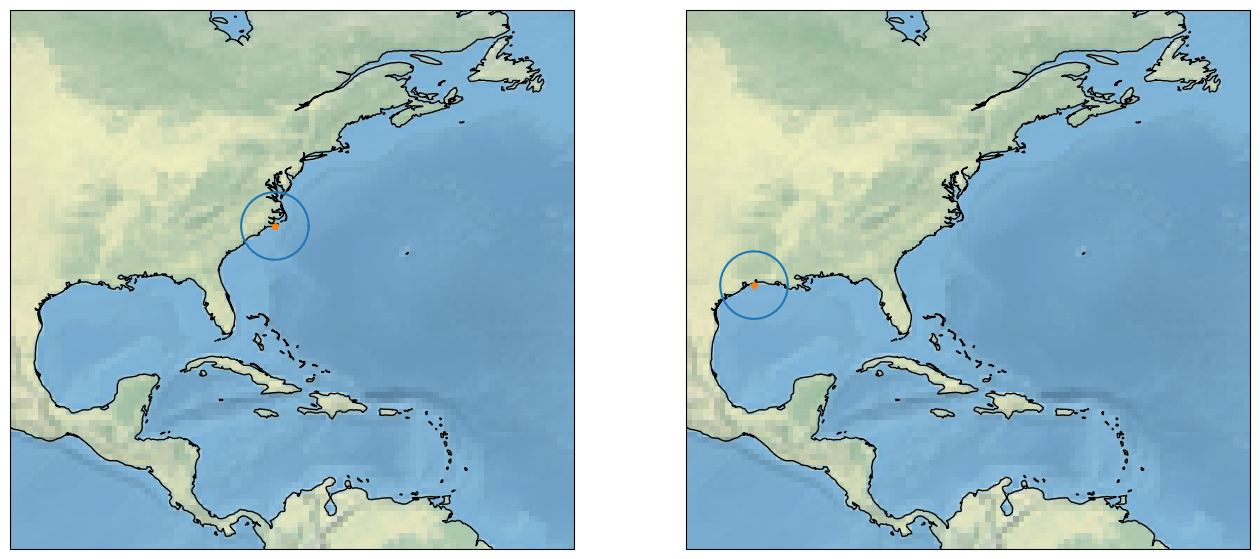

In [8]:
# plot the screening circles
if makeplots:

    fig, ax = plt.subplots(nrows=1,ncols=2,
                           subplot_kw={'projection': ccrs.PlateCarree()},
                           figsize=(16,7))
    ax=ax.flatten()
    
    ax[0].stock_img()
    ax[0].coastlines()
    ax[1].stock_img()
    ax[1].coastlines()
    
    ax[0].plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree())
    ax[1].plot(tx_circ['cirx'],tx_circ['ciry'],transform=ccrs.PlateCarree())

    ax[0].plot(nc_circ['lo'],nc_circ['la'],marker='*',transform=ccrs.PlateCarree())
    ax[1].plot(tx_circ['lo'],tx_circ['la'],marker='*',transform=ccrs.PlateCarree())

    for i in range(0,2):
        ax[i].axis('equal')
        ax[i].set_ylim([10, 50])
        ax[i].set_xlim([-100, -50])
        ax[i].grid(True)
        


In [25]:
# Find the storm index numbers (anssn) that pass thru the screening circles
# This gets the parts of tracks that enter the circles.  The complete track will be extracted below
df_nc=df.loc[(df['dist2nc'] <= nc_circ['rad'])]# & (df['Min_pres'] <= 980)]
df_tx=df.loc[(df['dist2tx'] <= tx_circ['rad'])]# & (df['Min_pres'] <= 980)]
# df_nc=df.loc[(df['dist2nc'] <=nc_circ['rad']) & (df['Category'] > 2)]
# df_tx=df.loc[(df['dist2tx'] <=tx_circ['rad']) & (df['Category'] > 2)]
idx_nc=np.unique(df_nc.index).astype(int)
idx_tx=np.unique(df_tx.index).astype(int)
print(f'Initial number of NC events = {len(idx_nc)}')
print(f'Initial number of TX events = {len(idx_tx)}')

Initial number of NC events = 588
Initial number of TX events = 493


In [26]:
# Screen out storms shorter than MinDays

MinDays=4
temp_list=list()
for idx in idx_nc: 
    df_temp=df.loc[df.index==idx].copy()    
    d=df_temp.iloc[:,2].values[-1]
    if d > MinDays: 
        temp_list.append(df_temp)
df_nc=pd.concat(temp_list)
idx_nc=np.unique(df_nc.index).astype(int)  # update index
          
temp_list=list()
for idx in idx_tx:
    df_temp=df.loc[df.index==idx].copy()
    d=df_temp.iloc[:,2].values[-1]
    if d > MinDays: 
        temp_list.append(df_temp)    
df_tx=pd.concat(temp_list)
idx_tx=np.unique(df_tx.index).astype(int)

print(f'Number of NC events = {len(idx_nc)}')
print(f'Number of TX events = {len(idx_tx)}')

Number of NC events = 261
Number of TX events = 73


Number of NC events = 240
Number of TX events = 69


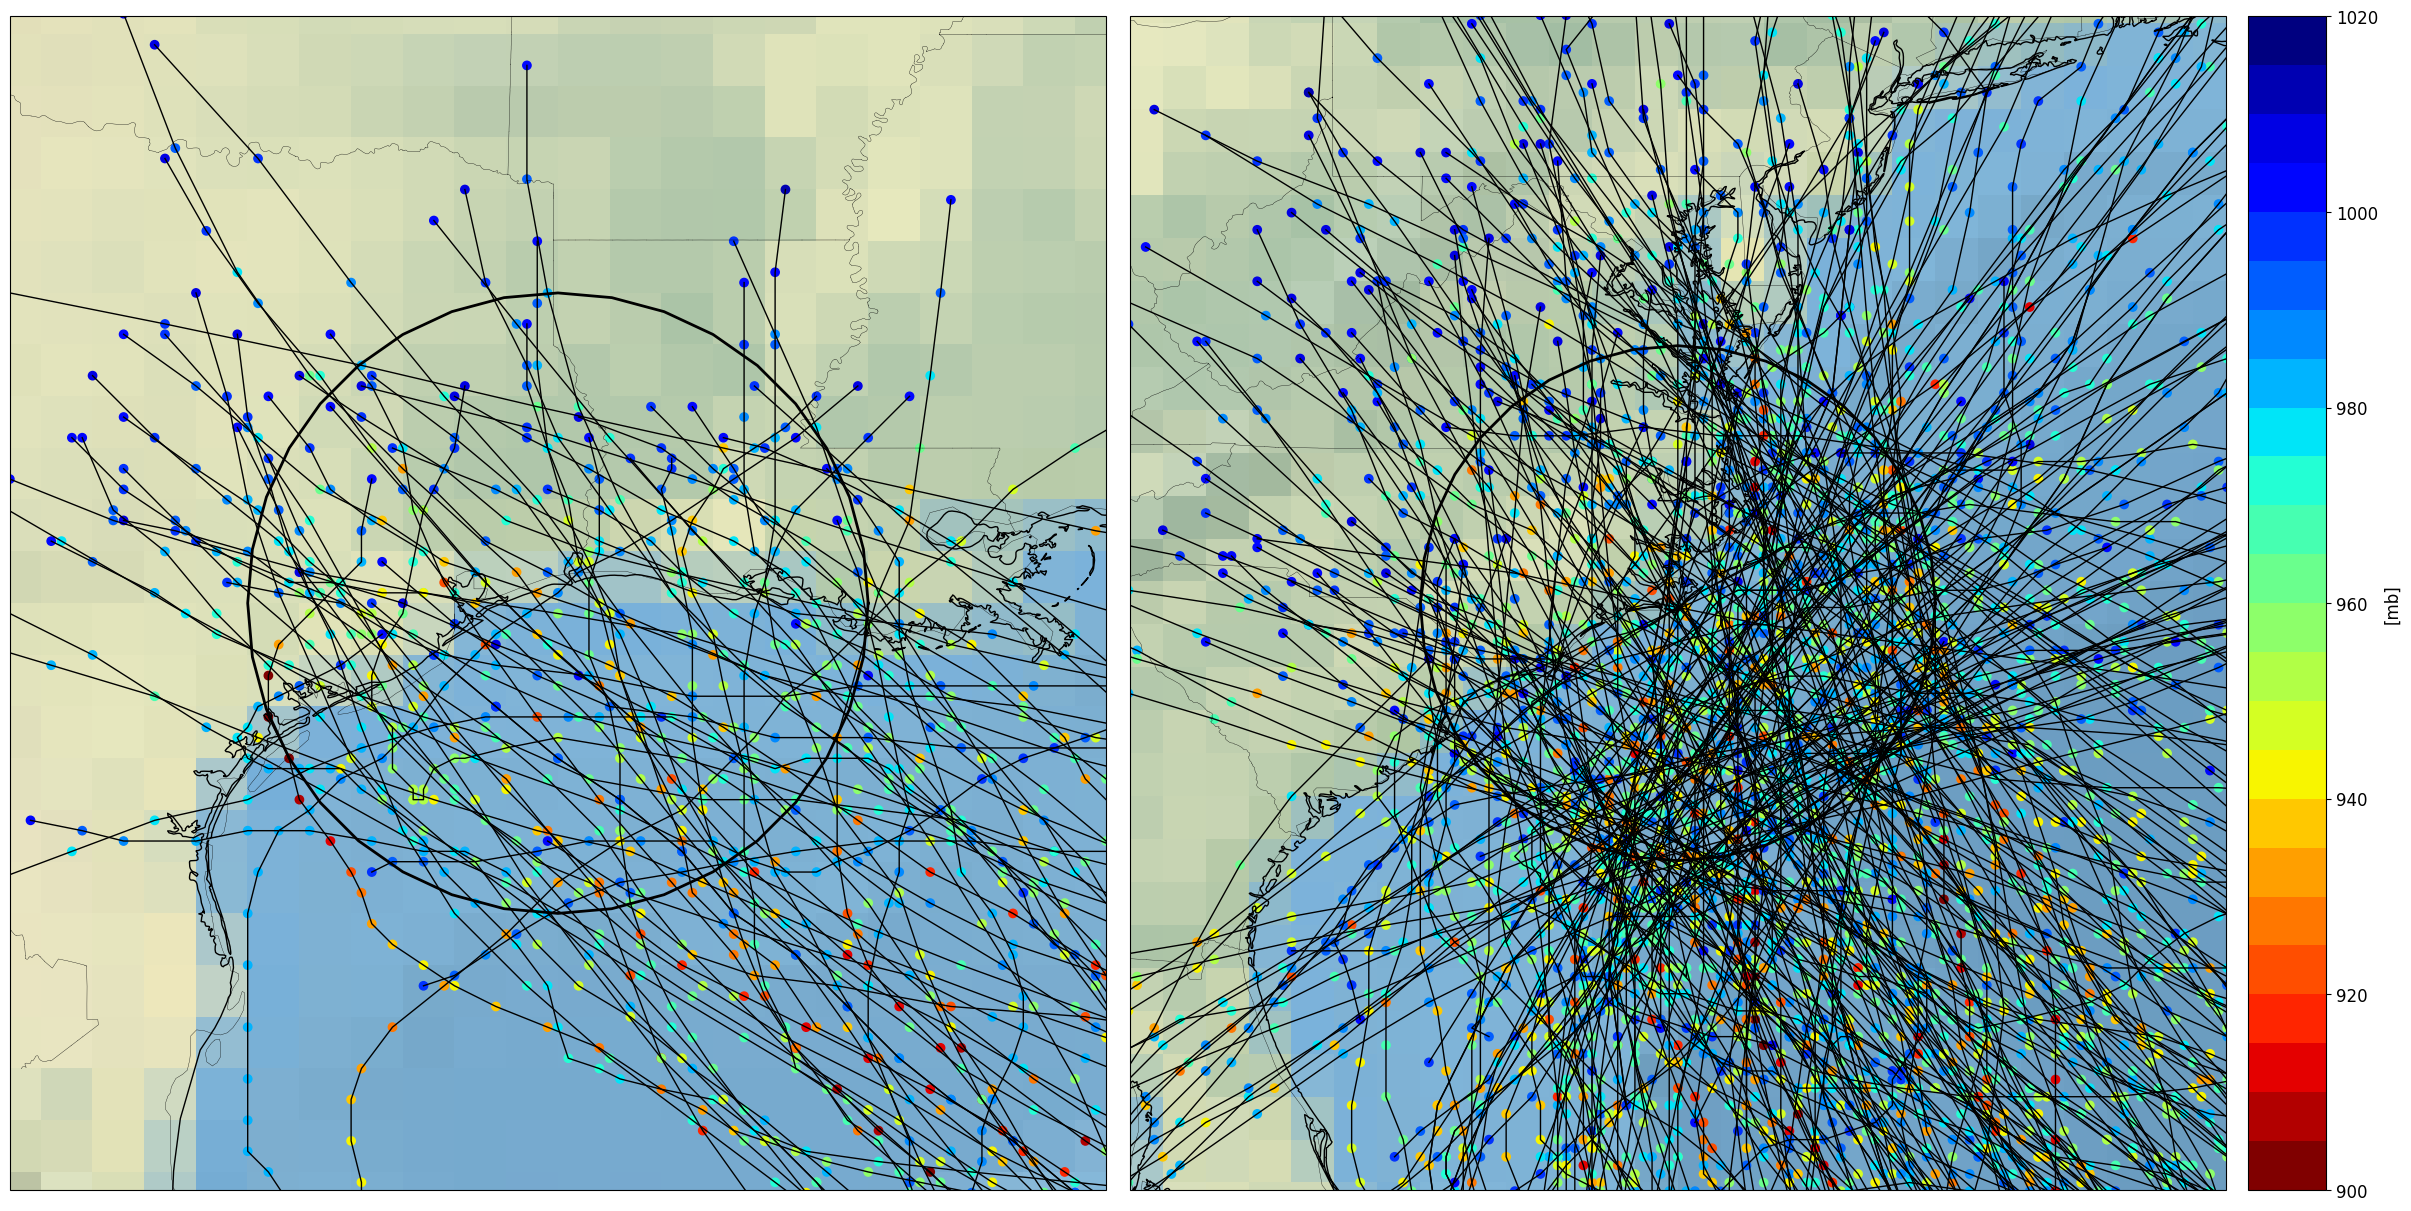

In [27]:
# Screen out parts of storm tracks significantly far from the study areas
# and eliminate storms that start within the screening circle. 

# NC

MaxLon_At_Start_Of_Track_NC=-60
MaxLat_At_End_Of_Track_NC=45
temp_list=list()

for i,idx in enumerate(idx_nc): 
    
    df_temp=df_nc.loc[df_nc.index==idx].copy()    
    
    while df_temp['Longitude'].iloc[0] > MaxLon_At_Start_Of_Track_NC:
        df_temp = df_temp.iloc[1: , :]
    while df_temp['Longitude'].iloc[-1] > MaxLon_At_Start_Of_Track_NC:
        df_temp = df_temp.iloc[:-2 , :]
    while df_temp['Latitude'].iloc[-1] > MaxLat_At_End_Of_Track_NC:
        df_temp = df_temp.iloc[:-2 , :]
    if df_temp.dist2nc.iloc[0] < nc_circ['rad']:
        df_temp = pd.DataFrame()
        
    temp_list.append(df_temp)
    
df_nc=pd.concat(temp_list)
idx_nc=np.unique(df_nc.index).astype(int)  # update index

# TX 

MinLon_At_Start_Of_Track_TX=-81
temp_list=list()

for i,idx in enumerate(idx_tx): 

    df_temp=df_tx.loc[df_tx.index==idx].copy()    
    
    while df_temp['Longitude'].iloc[0] > MinLon_At_Start_Of_Track_TX:
        df_temp = df_temp.iloc[1: , :]
    while df_temp['Longitude'].iloc[-1] > MinLon_At_Start_Of_Track_TX:
        df_temp = df_temp.iloc[:-2 , :]
    if df_temp.dist2tx.iloc[0] < tx_circ['rad']:
        df_temp = pd.DataFrame()
        
    temp_list.append(df_temp)
    
df_tx=pd.concat(temp_list)
idx_tx=np.unique(df_tx.index).astype(int)

print(f'Number of NC events = {len(idx_nc)}')
print(f'Number of TX events = {len(idx_tx)}')

# make plot of result
if makeplots:
    dlo, dla = 5, 5
    extnc=[nc_circ['lo']-dlo, nc_circ['lo']+dlo, nc_circ['la']-dla, nc_circ['la']+dla]
    exttx=[tx_circ['lo']-dlo, tx_circ['lo']+dlo, tx_circ['la']-dla, tx_circ['la']+dla]
    cheer_utils.fullTrackPlot(df_nc,extnc,nc_circ,df_tx,exttx,tx_circ,fname=f'STORM_{basin}_{ensnum}_NC_TX_{model}_2.png')

(0.0, 0.04)

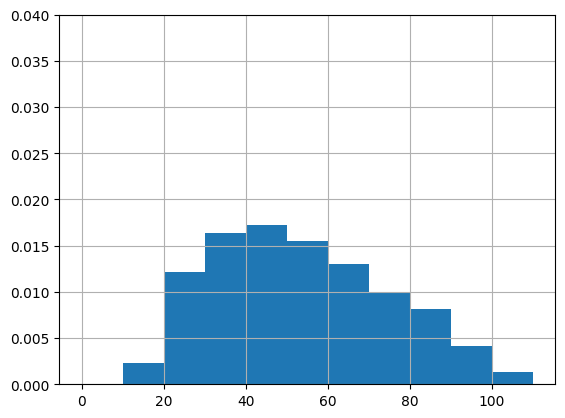

In [39]:
axx=(-(df_nc['Min_pres']-1020)).hist( density=True, bins=range(0,120,10))
axx.set_ylim([0, .040])
axx.set_xlabel('Delta-P')

In [34]:
df.Category.max()

5.0

In [9]:
if writeoutputfiles: 
    # Flush tracks to csv files
    # Loop over abssn in subset and export complete track for each

    if not os.path.exists('CHEER_Tracks'):
        os.mkdir('CHEER_Tracks')
    if not os.path.exists(f'CHEER_Tracks/{model}'):
        os.mkdir(f'CHEER_Tracks/{model}')

    for idx in idx_nc: # [0:10]:
        fname=f'CHEER_Tracks/{model}/NC_{model}_{ensnum}_{idx:05d}.csv'
        df_temp=df_nc.loc[df_nc.index==idx]
        df_temp.to_csv(fname,float_format='%.3f')

    # for idx in idx_tx: # [0:10]:
    #     fname=f'CHEER_Tracks/TX_Present_{ensnum}_{idx:05d}.csv'
    #     df_temp=df_tx.loc[df_tx.index==idx]
    #     df_temp.to_csv(fname,float_format='%.3f')

    # also save as pkl files for subsequent loading/analysis
    df_nc.to_pickle(f'CHEER_Tracks/{model}/NC_{model}_{ensnum}.pkl')
    # df_tx.to_pickle(f'TX_Present_{ensnum}.pkl')

In [ ]:
if writeoutputfiles: 
    # output for ADCIRC NWS67
    #     time      lon      lat      dp       du       dv     RMW    B
    #    [days]    [deg]    [deg]    [Pa]     [m/s]    [m/s]  [km]    []
    dt=3*3600

    #test_nc_indx=[1454, 7032, 7981]

    dropvars=['Basin_ID','TC_number','Landfall','Dist2land','dist2nc','dist2tx','Category','Month','Year','Day','Hour','Time_step']
    keepvars=['Longitude', 'Latitude', 'Dp','du','dv','RMW','HollandB'] # ,'abssn']

    for idx in idx_nc: 

        df_temp=df_nc.loc[df_nc.index==idx].copy()

        # display(df_temp.head(2))
        # display(df_temp.tail(2))

        temp=df_temp.index

        df_temp['Dp']=101300-df_temp['Min_pres']*100

        du=((df_temp['Longitude']*1.1119e+05).diff())/dt
        du.iloc[0]=du.iloc[1]
        df_temp['du']=du

        dv=((df_temp['Latitude']*1.1119e+05).diff())/dt
        dv.iloc[0]=dv.iloc[1]
        df_temp['dv']=dv

        df_temp['time']=df_temp.Year+df_temp.Month/12+df_temp.Day/365+df_temp.Hour/8760
        df_temp.set_index('time',inplace=True)
        df_temp['abssn']=temp

        df_temp = df_temp.drop(dropvars,axis=1)
        df_temp = df_temp[keepvars]

        #df_temp_stalled=storm_stall(df_temp)

        #fname=f'CHEER_Tracks/{model}/NC_{model}_{ensnum}_{idx:05d}_ext.22'
        #df_temp_stalled.to_csv(fname,float_format='%.6f',header=False)

        fname=f'CHEER_Tracks/{model}/NC_{model}_{ensnum}_{idx:05d}.22'
        df_temp.to_csv(fname,float_format='%.6f',header=False)


In [ ]:
# plot a few tracks
if makeplots:
    idx=idx_nc[np.random.randint(len(idx_nc), size=3)] # [1454, 7032, 7981]
    temp_list=[]
    for i,b in enumerate(idx): 
        df_temp=df_nc.loc[df_nc.index==b]#.copy()    
        temp_list.append(df_temp) 
    df_sub=pd.concat(temp_list)

    fig2, ax2 = plt.subplots(nrows=1, ncols=1, 
                             figsize=(10,3), 
                             constrained_layout=True) #, sharey=True)

    extent=[-85, -56, 15, 40]
    fig,ax=cheer_utils.TrackPlot(df_sub,extent=extent,fname=f'STORM_{basin}_NC_{climate}_{ensnum}_exampleTrack.png')

    for i,b in enumerate(idx): 
        x=df_sub.loc[df_sub.index==b].Longitude
        y=df_sub.loc[df_sub.index==b].Latitude
        p=df_sub.loc[df_sub.index==b].Min_pres
        t=df_sub.loc[df_sub.index==b].Time_step
        sn=df_sub.loc[df_sub.index==b].index.values.astype('str')
    #    for x2, y2 in zip(x[::6], y[::6]):
        ax.text(x.iloc[0], y.iloc[0], sn[0], clip_on=True, fontsize=24)

        ax2.plot(t-t.iloc[0],p)

    ax2.set_ylabel('Pressure [mb]')
    ax2.set_xlabel('Track Hours')

    ax.set_xlim([-90, -58])
    ax.set_ylim([20, 40])

# Figure 4: Synthetic hurricanes from the STORM dataset. 

In [ ]:
# Interesting plot of all tracks and case study tracks
if makeplots: 
    # basin-scale
    extent = [ -110, 0, 5, 60] 
    #central_lon = np.mean(extent[:2])
    #central_lat = np.mean(extent[2:])

    width=12
    fac=(extent[1]-extent[0])/(extent[3]-extent[2])

    fig, ax = plt.subplots(nrows=1, ncols=1, 
                           figsize=(width, width/fac), 
                           constrained_layout=True)

    for i,idx in enumerate(idx_all): 
        x=df.loc[df.index==idx].Longitude
        y=df.loc[df.index==idx].Latitude
        c=df.loc[df.index==idx].Min_pres
        ax.plot(x, y, linewidth=.1, color='k')
        #cm=ax[0].scatter(x=x, y=y, c=c, cmap=cmap, norm=norm, s=12)

    for i,idx in enumerate(idx_tx): 
        x=df_tx.loc[df_tx.index==idx].Longitude
        y=df_tx.loc[df_tx.index==idx].Latitude
        c=df_tx.loc[df_tx.index==idx].Min_pres
        ax.plot(x, y, linewidth=1,  color='r')

    for k,idx in enumerate(idx_nc): 
        x=df_nc.loc[df_nc.index==idx].Longitude
        y=df_nc.loc[df_nc.index==idx].Latitude
        c=df_nc.loc[df_nc.index==idx].Min_pres
        ax.plot(x, y, linewidth=1, color='b')

    ax.plot(cheer_utils.coastline[:,0],cheer_utils.coastline[:,1],color='k',linewidth=.25)
    ax.plot(cheer_utils.statelines[:,0],cheer_utils.statelines[:,1],color='k',linewidth=.25)

    ax.axis('equal')
    ax.set_xlim(extent[0:2])
    ax.set_ylim(extent[2:4])
    ax.grid(True)

    # cb1 = fig.colorbar(cm, ax=ax, orientation='vertical', shrink=0.65, pad=0.025)
    # cb1.ax.set_ylabel('[mb]', size=16)
    # cb1.ax.tick_params(labelsize='large')

    plt.box(True)

    fig.savefig(f'STORM_{basin}_{climate}_{model}_{ensnum}.png')

In [ ]:
# basic plots
if makeplots:
    fig, ax = plt.subplots(nrows=1, ncols=3, 
                           figsize=(10,5), 
                           constrained_layout=True) #, sharey=True)

    df_sub['Category'].hist(ax=ax[0],bins=np.linspace(-0.5,5.5,7),density=True)
    ax[0].set_title('SS Category')
    df_sub['MaxWindSpd'].hist(ax=ax[1],bins=np.linspace(-5,85,20),density=True)
    ax[1].set_title('MaxWindSpd')
    df_sub['RMW'].hist(ax=ax[2],bins=np.linspace(-5,105,24),density=True)
    ax[2].set_title('RMW');


In [ ]:
# print(df_temp)
cheer_utils.out_to_nws8(df_temp,fname='test.nws8',stormname=f'x{df_temp.index[0]:04n}')
#cheer_utils.out_to_nws8(df_temp,fname='test.nws8')

In [ ]:
if writeoutputfiles: 
    for idx in idx_nc: 
        df_temp=df_nc.loc[df_nc.index==idx]
        fname=f'CHEER_Tracks/{model}/NC_{model}_{ensnum}_{idx:05d}.nws8'
        cheer_utils.out_to_nws8(df_temp,fname=fname,stormname=f'x{idx:04n}')

In [ ]:
# extent=[-80, -60, 20, 40]
# #fig,ax=fullTrackPlot(df_nc,extent,nc_circ,df_tx,extent,tx_circ,fname=None)  # 'STORM_NA_0_NC_TX_PRESENT_1.png')
# fig,ax=TrackPlot(df_nc,extent=extent)
# rad=.3
# lo=-77.75
# la=35
# nc_circ_test={'lo': lo,
#               'la': la, 
#               'rad': rad,
#               'cirx': rad*np.cos(a)+lo,
#               'ciry': rad*np.sin(a)+la}

# ax.plot(nc_circ_test['cirx'],nc_circ_test['ciry'])#,transform=crs)

# for i,idx in enumerate(idx_nc): 
#     x=df.loc[df.index==idx].Longitude
#     y=df.loc[df.index==idx].Latitude
#     sn=df.loc[df.index==idx].index.values.astype('str')
#     for x2, y2 in zip(x[::6], y[::6]):
#         ax.text(x2, y2, sn[0], clip_on=True, fontsize=12)


In [ ]:
# MaxLat_At_End_Of_Track_NC=45
# for i,idx in enumerate(idx_nc): 
#     df_temp=df_nc[df_nc.index==idx]
#     if df_temp.Latitude.iloc[-1]>MaxLat_At_End_Of_Track_NC:
#         print(i,idx,df_temp.Latitude.iloc[-1])
#         break

# df_temp=df_nc.loc[df_nc.index==idx].copy()    
# print(df_temp.Latitude.iloc[-10:])
# while df_temp['Longitude'].iloc[0] > MaxLon_At_Start_Of_Track_NC:
#     df_temp = df_temp.iloc[1: , :]
# while df_temp['Longitude'].iloc[-1] > MaxLon_At_Start_Of_Track_NC:
#     df_temp = df_temp.iloc[:-2 , :]
# while df_temp['Latitude'].iloc[-1] > MaxLat_At_End_Of_Track_NC:
#     df_temp = df_temp.iloc[:-2 , :]
# # if df_temp.dist2nc.iloc[0] < nc_circ['rad']:
# #     df_temp = pd.DataFrame()

# print(df_temp.Latitude.iloc[-10:])